In [13]:
#Librerias que vamos a utilizar
import numpy as np
import pyhdf.SD
from pyhdf.SD import SD,SDC #Necesitamos la libreria pyhdf para leer archivos y SD una clase
import glob #una libreria que usamos
import pandas as pd
import matplotlib.pyplot as plt
import re #liberia para regex que luego usaremos en texto

Datos 

In [14]:
#Ruta donde se encuentran los archivos hdf
DataPath = 'archivos'

#Generamos una variable con todos los archivos de la carpeta
Filelist = glob.glob(DataPath+'/*')

#Ruta donde se encuentran los archivos hdf
DataPath = 'geolocation'

#Generamos una variable con todos los archivos de la carpeta
Filelist_geo = glob.glob(DataPath+'/*')

In [15]:
from ipynb.fs.full.funciones_hdf import *

Trabajamos con los datos previos al incendio

In [25]:
#Archivo con datos previos al incendio
bef_fire = lee_archivo(Filelist[1])

#Archivo con datos georeferenciados previos al incendio
bef_fire_geo = lee_archivo(Filelist_geo[0])

#Hora y fecha 
bef_fire_date = fecha_archivo(bef_fire)

bef_fire_hour = hora_archivo(bef_fire)

#Latitud y longitud
bef_fire_lat = extrae_datos_hdf(bef_fire_geo,"Latitude")[0]
bef_fire_lon = extrae_datos_hdf(bef_fire_geo,"Longitude")[0]

In [26]:
#Calculamos Indice normalizado de area quemada
bef_fire_nbr = indice_nbr(bef_fire,"EV_500_Aggr1km_RefSB","band_names")

Graficado

In [28]:
from matplotlib.ticker import FixedLocator
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [45]:
# Cargamos los límites de países y provincias para poder graficarlas en los mapas

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none',edgecolor='black')

countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',edgecolor='white')

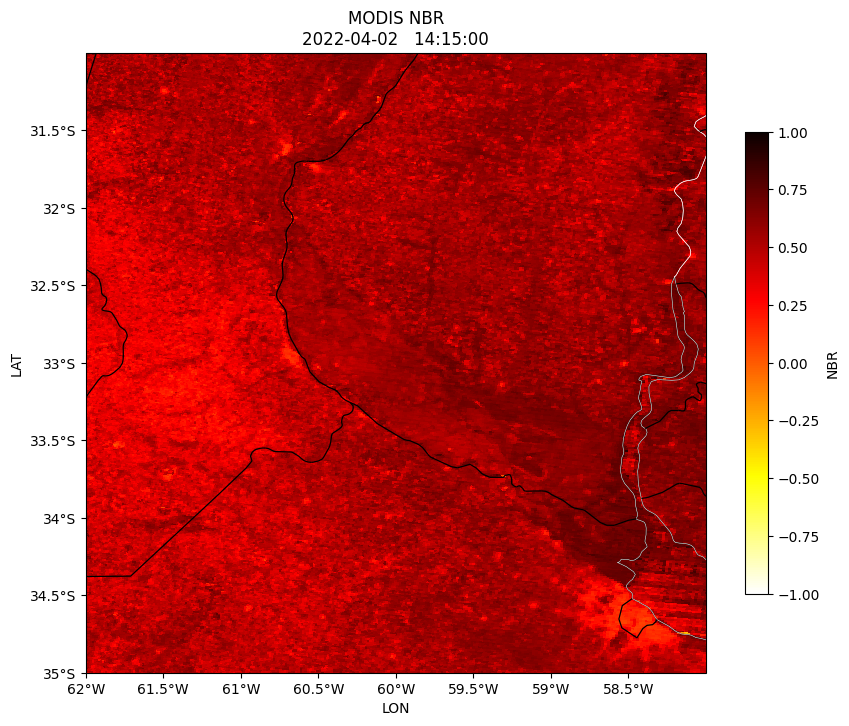

In [47]:
# Definimos los limites del area a visualizar
latnorth=-31
latsouth=-35
lonwest=-62
loneast=-58

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos

#Agregamos ejes
ax1.set_title("MODIS NBR\n"+str(bef_fire_date)+"   "+str(bef_fire_hour))
ax1.set_ylabel("LAT")
ax1.set_xlabel("LON")
    
cm=ax1.pcolormesh(bef_fire_lon,bef_fire_lat,bef_fire_nbr,cmap='hot_r',vmin=-1,vmax=1)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.9)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('NBR',fontsize=10)

Datos post incendio

In [56]:
fecha_archivo(lee_archivo(Filelist[0]))

'2022-08-13'

In [51]:
#Archivo con datos post al incendio
aft_fire = lee_archivo(Filelist[0])

#Archivo con datos georeferenciados post al incendio
#bef_fire_geo = lee_archivo(Filelist_geo[0])

#Hora y fecha 
aft_fire_date = fecha_archivo(aft_fire)

aft_fire_hour = hora_archivo(aft_fire)

#Latitud y longitud
#aft_fire_lat = extrae_datos_hdf(aft_fire,"Latitude")[0]
#aft_fire_lon = extrae_datos_hdf(aft_fire,"Longitude")[0]

In [52]:
#Calculamos Indice normalizado de area quemada
aft_fire_nbr = indice_nbr(bef_fire,"EV_500_Aggr1km_RefSB","band_names")